<a href="https://colab.research.google.com/github/efwoods/FacialEmotionDetection/blob/main/Evan_Woods_Notebook_Facial_Emotion_Detection_Final_Submission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Final Submission**

We have built two Convolutional Neural Network architectures in Milestone 1. Here, we will further try to achieve better performance by increasing the number of parameters/weights. Therefore, we will start this Milestone with three popular Transfer Learning architectures, namely, VGG16, ResNet v2, and Efficient Net. Please feel free to explore other pre-trained models as well. Link to Keras documentation for pre-trained models - https://keras.io/api/applications/

**Note:** We will mount our drive and import our dataset once again for Milestone 2.

## **Mounting the Drive**

**NOTE:**  Please use Google Colab from your browser for this notebook. **Google.colab is not a library that can be downloaded locally on your device.**

In [ ]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Importing the Libraries**

In [ ]:
import zipfile
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
import pickle

# Importing Deep Learning Libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout, GlobalAveragePooling2D, Flatten, Conv2D, BatchNormalization, Activation, MaxPooling2D, LeakyReLU
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam, SGD, RMSprop

### **Let us load the data**

In [ ]:
# Save and Load models and model fit history (template code)

model_file_name = '/efficientNetModel_v_0_1.h5'
filepath = '/content/drive/MyDrive/'

# Save the model
def save_model_and_history(model, model_file_name, history, model_history_name):
  
  # Save the model
  filepath = '/content/drive/MyDrive/'
  model_file_path = filepath + model_file_name + '.h5'
  tf.keras.Model.save(model,model_file_path)

  # Save the model history for plotting
  full_filepath = filepath + model_history_name + '.pkl'
  with open(full_filepath, 'wb') as f:
    pickle.dump(history.history, f)
  f.close()

  #
  print("Model history: ",full_filepath)
  print("Model: ", model_file_path)

# Load the model and history

def load_model_and_history(model_file_name, model_history_name):

  # Load the model
  filepath = '/content/drive/MyDrive/'
  model_file_path = filepath + model_file_name + '.h5'
  x = tf.keras.models.load_model(model_file_path)

# Load the history from a file
  full_filepath = filepath + model_history_name + '.pkl'
  with open(full_filepath, 'rb') as f:
    history_dict = pickle.load(f)
  f.close()
  
  return x, history_dict 

**Note:** 
- You must download the dataset from the link provided on Olympus and upload the same on your Google drive before executing the code in the next cell.
- In case of any error, please make sure that the path of the file is correct as the path may be different for you.

In [ ]:
# Storing the path of the data file from the Google drive
path = '/content/drive/MyDrive/Facial_emotion_images.zip'

# The data is provided as a zip file so we need to extract the files from the zip file
with zipfile.ZipFile(path, 'r') as zip_ref:
    zip_ref.extractall()

In [ ]:
picture_size = 48
folder_path = "Facial_emotion_images/"

## **Transfer Learning Architectures**

In this section, we will create several Transfer Learning architectures. For the pre-trained models, we will select three popular architectures namely, VGG16, ResNet v2, and Efficient Net. The difference between these architectures and the previous architectures is that these will require 3 input channels while the earlier ones worked on 'grayscale' images. Therefore, we need to create new DataLoaders.

### **Creating our Data Loaders for Transfer Learning Architectures**

In this section, we are creating data loaders that we will use as inputs to our Neural Network. Unlike in Milestone 1, we will have to go with color_mode = 'rgb' as this is the required format for the transfer learning architectures.

In [ ]:
batch_size  = 32
img_size = 48

datagen_train = ImageDataGenerator(horizontal_flip = True,
                                  rotation_range=15,
                                  zoom_range=0.15,
                                  zca_whitening=False,
                                  brightness_range = (0., 2.),
                                  rescale = 1./255,
                                  shear_range = 0.3)

train_set = datagen_train.flow_from_directory(folder_path + "train",
                                            target_size = (img_size, img_size),
                                            color_mode = 'rgb',
                                            batch_size = batch_size,
                                            class_mode = 'categorical',
                                            classes = ['happy', 'sad', 'neutral', 'surprise'],
                                            shuffle = True)

datagen_validation = ImageDataGenerator(horizontal_flip = True,
                                  rotation_range=15,
                                  zoom_range=0.15,
                                  zca_whitening=False,
                                  brightness_range = (0., 2.),
                                  rescale = 1./255,
                                  shear_range = 0.3)

validation_set = datagen_train.flow_from_directory(folder_path + "validation",
                                              target_size = (img_size, img_size),
                                              color_mode = 'rgb',
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              classes = ['happy', 'sad', 'neutral', 'surprise'],
                                              shuffle = True)

datagen_test = ImageDataGenerator(horizontal_flip = True,
                                  rotation_range=15,
                                  zoom_range=0.15,
                                  zca_whitening=False,
                                  brightness_range = (0., 2.),
                                  rescale = 1./255,
                                  shear_range = 0.3)

test_set = datagen_train.flow_from_directory(folder_path + "test",
                                              target_size = (img_size, img_size),
                                              color_mode = 'rgb',
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              classes = ['happy', 'sad', 'neutral', 'surprise'],
                                              shuffle = True)

Found 15085 images belonging to 4 classes.
Found 4970 images belonging to 4 classes.
Found 127 images belonging to 4 classes.


## **VGG16 Model**

In [ ]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [ ]:
!cat /proc/cpuinfo
!cat /proc/meminfo


### **Importing the VGG16 Architecture**

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras import Model

vgg = VGG16(include_top = False, weights = 'imagenet', input_shape = (48, 48, 3))
vgg.summary()

58889256/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                              

### **Model Building**

* In this model, we will import till the **'block5_pool'** layer of the VGG16 model. You can scroll down in the model summary and look for 'block5_pool'. You can choose any other layer as well.
* Then we will add a Flatten layer, which receives the output of the 'block5_pool' layer as its input.
* We will add a few Dense layers and use 'relu' activation function on them.
* You may use Dropout and BatchNormalization layers as well.
* Then we will add our last dense layer, which must have 4 neurons and a 'softmax' activation function.

In [ ]:
transfer_layer = vgg.get_layer('block5_pool')
vgg.trainable = False

# Add classification layers on top of it  

# Flattenning the output from the 3rd block of the VGG16 model
x = Flatten()(transfer_layer.output)

# Add a Dense Layer with 64 neurons
x = Dense(64, activation = 'relu')(x)

# Adding the final dense layer with 4 neurons and use 'softmax' activation
pred = Dense(4, activation='softmax')(x)

vggmodel = Model(vgg.input, pred) # Initializing the model

### **Compiling and Training the VGG16 Model**

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./vggmodel.h5", monitor = 'val_loss', verbose = 1, save_best_only = True, mode = 'max')

early_stopping = EarlyStopping(monitor = 'val_loss',
                          min_delta = 0,
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 3,
                              verbose = 1,
                              min_delta = 0.0001)

callbacks_list = [early_stopping, checkpoint, reduce_learningrate]

epochs = 20

In [ ]:
# Write your code to compile the vggmodel. Use categorical crossentropy as the loss function, Adam Optimizer with 0.001 learning rate, and set metrics to 'accuracy'. 
vggmodel.compile(
    loss = 'categorical_crossentropy', 
    optimizer = Adam(learning_rate = 0.01),
    metrics = ['accuracy'])


In [ ]:
# Write your code to fit your model. Use train_set as the training data and validation_set as the validation data. Train the model for 20 epochs.
history = vggmodel.fit(
    train_set,
    validation_data = validation_set,
    epochs = 5)


Epoch 1/5
472/472 [==============================] - 522s 1s/step - loss: 1.2358 - accuracy: 0.4286 - val_loss: 1.1948 - val_accuracy: 0.4658
Epoch 2/5
472/472 [==============================] - 515s 1s/step - loss: 1.1847 - accuracy: 0.4615 - val_loss: 1.2008 - val_accuracy: 0.4479
Epoch 3/5
472/472 [==============================] - 519s 1s/step - loss: 1.1667 - accuracy: 0.4792 - val_loss: 1.1641 - val_accuracy: 0.4805
Epoch 4/5
472/472 [==============================] - 521s 1s/step - loss: 1.1567 - accuracy: 0.4838 - val_loss: 1.1994 - val_accuracy: 0.4598
Epoch 5/5
472/472 [==============================] - 520s 1s/step - loss: 1.1536 - accuracy: 0.4847 - val_loss: 1.1974 - val_accuracy: 0.4481


In [ ]:
# Save the model
model_file_path = '/content/drive/MyDrive/Vggmodel_0.4_5_epochs.h5'
keras.Model.save(vggmodel,model_file_path)

In [ ]:
# Save the history to a file

filepath = '/content/drive/MyDrive/'
full_filepath = filepath + 'vgg_history_0.4_5_epochs.pkl'
with open(full_filepath, 'wb') as f:
    pickle.dump(history.history, f)

In [ ]:
# Load the model
model_file_path = '/content/drive/MyDrive/Vggmodel_0.4_5_epochs.h5'
vggmodel = keras.models.load_model(model_file_path)

In [ ]:
# Load the history from a file
filepath = '/content/drive/MyDrive/'
with open(filepath +'vgg_history_0.3_5_epochs.pkl', 'rb') as f:
    history_dict = pickle.load(f)

### **Evaluating the VGG16 model**

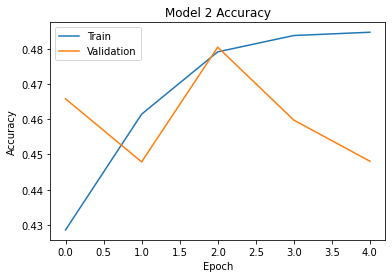

In [ ]:
# Write your code to evaluate model performance on the test set
plt.plot(history_dict['accuracy'])

plt.plot(history_dict['val_accuracy'])

plt.title('Model 2 Accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epoch')

plt.legend(['Train', 'Validation'], loc = 'upper left')

# Display the plot
plt.show()

In [ ]:
score = vggmodel.evaluate(test_set)

4/4 [==============================] - 3s 711ms/step - loss: 1.1655 - accuracy: 0.4488


**Think About It:**

- What do you infer from the general trend in the training performance? 
  - The model becomes overfit. The model does not accurately respond to the validation data, but the performance has improved with after having curated the dataset.
- Is the training accuracy consistently improving? 
  - There is a general trend with respect to the accuracy improvement, however there are edges detected while the accuracy improves.
- Is the validation accuracy also improving similarly?
  - The validation accuracy is improving, but is much more variant.

**Observations and Insights:  The model becomes overfit. The model does not accurately respond to the validation data, but the performance has improved with after having curated the dataset. There is a general trend with respect to the accuracy improvement, however there are edges detected while the accuracy improves. The validation accuracy is improving, but is much more variant. I believe there are images in the data that are causing this behavior.**

**Note: You can even go back and build your own architecture on top of the VGG16 Transfer layer and see if you can improve the performance**

**Observations and Insights: There is a bimodal distribution of the validation accuracy. The training accuracy does not improve & is very low.**

**Note: You can even go back and build your own architecture on top of the ResNet Transfer layer and see if you can improve the performance.**

## **EfficientNet Model**

In [ ]:
import tensorflow as tf
import tensorflow.keras.applications as ap
from tensorflow.keras import Model
EfficientNet = ap.EfficientNetV2B2(include_top=False,weights="imagenet", input_shape= (48, 48, 3))

EfficientNet.summary()

### **Model Building**

**Build your own Architecture on top of the transfer layer. Be sure to have a Flatten layer after your transfer layer and also make sure you have 4 neurons and softmax activation function in your last dense layer**

In [ ]:


transfer_layer_EfficientNet = EfficientNet.get_layer('block6e_expand_activation')
EfficientNet.trainable = False

# Add your Flatten layer.
x = Flatten()(transfer_layer_EfficientNet.output)

# Add your Dense layers and/or BatchNormalization and Dropout layers

# Add a Dense layer with 256 neurons
x = Dense(256, activation = 'relu')(x)

# Add a Dense Layer with 128 neurons
x = Dense(128, activation = 'relu')(x)

# Add a DropOut layer with Drop out ratio of 0.3
# x = Dropout(0.3)(x)

# Add a Dense Layer with 64 neurons
x = Dense(64, activation = 'relu')(x)

# Add a Batch Normalization layer
x = BatchNormalization()(x)

# Add your final Dense layer with 4 neurons and softmax activation function.
pred = Dense(4, activation = 'softmax')(x)

Efficientnetmodel = Model(EfficientNet.input, pred)  # Initializing the model

In [ ]:
efficient_net_activiation_layer = EfficientNet.get_layer('block6j_activation').output

In [ ]:
efficient_net_activiation_layer

<KerasTensor: shape=(None, 2, 2, 1248) dtype=float32 (created by layer 'block6j_activation')>

In [ ]:
from tensorflow.keras.layers import GlobalMaxPool2D

In [ ]:
global_pool = GlobalMaxPool2D(name="global_pool")(efficient_net_activiation_layer)

In [ ]:
output_layer = Dense(4, activation="softmax", name="output_layer")(global_pool)

In [ ]:
efficientNetModel_v_0_1 = Model(inputs=EfficientNet.input, outputs = output_layer)

In [ ]:
# arbitrarily selecting the first 14 layers to be non-trainable
for layer in efficientNetModel_v_0_1.layers[:15]:
  layer.trainable = False

### **Compiling and Training the Model**

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./Efficientnetmodel.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor = 'val_accuracy',
                               min_delta = 0.00008,
                               patience = 3,
                               verbose = 1,
                               restore_best_weights = True
                               )  # Write your code here. You may play around with the hyperparameters if you wish.


reduce_learningrate = ReduceLROnPlateau(monitor = 'val_accuracy',
                                        factor = 0.25,
                                        patience = 4,
                                        verbose = 1,
                                        min_delta = 0.0001,
                                        min_lr = 1e-07
                                        ) # Write your code here. You may play around with the hyperparameters if you wish.
callbacks_list = [early_stopping,checkpoint,reduce_learningrate]

epochs = 40

In [ ]:
# Write your code to compile your Efficientnetmodel. Use categorical crossentropy as your loss function, Adam Optimizer with 0.001 learning rate, and set your metrics to 'accuracy'.

efficientNetModel_v_0_1.compile(
    loss = 'categorical_crossentropy', 
    optimizer = Adam(learning_rate = 0.001),
    metrics = ['accuracy'])

In [ ]:
# Write your code to fit your model. Use train_set as your training data and validation_set as your validation data. Train your model for 20 epochs.
history = efficientNetModel_v_0_1.fit(    
    train_set,
    validation_data = validation_set,
    callbacks = callbacks_list,
    use_multiprocessing=True,
    epochs = epochs)

Epoch 1/40
472/472 [==============================] - ETA: 0s - loss: 1.5496 - accuracy: 0.2537

472/472 [==============================] - 166s 326ms/step - loss: 1.5496 - accuracy: 0.2537 - val_loss: 1.4775 - val_accuracy: 0.2443 - lr: 0.0100
Epoch 2/40
472/472 [==============================] - ETA: 0s - loss: 1.5382 - accuracy: 0.2458

472/472 [==============================] - 147s 311ms/step - loss: 1.5382 - accuracy: 0.2458 - val_loss: 1.4146 - val_accuracy: 0.3670 - lr: 0.0100
Epoch 3/40
472/472 [==============================] - ETA: 0s - loss: 1.5294 - accuracy: 0.2584

472/472 [==============================] - 148s 314ms/step - loss: 1.5294 - accuracy: 0.2584 - val_loss: 1.6100 - val_accuracy: 0.2300 - lr: 0.0100
Epoch 4/40
472/472 [==============================] - ETA: 0s - loss: 1.5425 - accuracy: 0.2517

472/472 [==============================] - 158s 335ms/step - loss: 1.5425 - accuracy: 0.2517 - val_loss: 1.4007 - val_accuracy: 0.3670 - lr: 0.0100
Epoch 5/40
472/472 [==============================] - ETA: 0s - loss: 1.5291 - accuracy: 0.2593Restoring model weights from the end of the best epoch: 2.


472/472 [==============================] - 152s 323ms/step - loss: 1.5291 - accuracy: 0.2593 - val_loss: 1.9995 - val_accuracy: 0.1600 - lr: 0.0100
Epoch 5: early stopping


In [ ]:
model_file_path = '/content/drive/MyDrive/efficientNetModel_v_0_1.h5'
filepath = '/content/drive/MyDrive/'

In [ ]:
# Save the model
model_file_path = '/content/drive/MyDrive/efficientNetModel_v_0_2.h5'
tf.keras.Model.save(efficientNetModel_v_0_1,model_file_path)

# Save the history to a file
import pickle
filepath = '/content/drive/MyDrive/'
full_filepath = filepath + 'efficientNetModel_v_0_2_history.pkl'
with open(full_filepath, 'wb') as f:
    pickle.dump(history.history, f)


In [ ]:
# Load the model
# x = tf.keras.models.load_model(model_file_path)

In [ ]:
# Load the history from a file
with open(filepath +'efficientNetModel_v_0_1_history.pkl', 'rb') as f:
    history_dict = pickle.load(f)

### **Evaluating the EfficientnetNet Model**

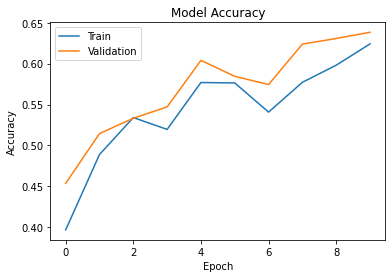

In [ ]:
# Write your code to evaluate the model performance on the test set

plt.plot(history_dict['accuracy'])

plt.plot(history_dict['val_accuracy'])

plt.title('Model Accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epoch')

plt.legend(['Train', 'Validation'], loc = 'upper left')

# Display the plot
plt.show()

**Observations and Insights: The model accuracy is over twice as large as the initial 26% accuracy.**


**Think About It:**

* What is your overall performance of these Transfer Learning Architectures? Can we draw a comparison of these models' performances. Are we satisfied with the accuracies that we have received?
* Do you think our issue lies with 'rgb' color_mode?

Now that we have tried multiple pre-trained models, let's build a complex CNN architecture and see if we can get better performance.

## **Building a Complex Neural Network Architecture**

In this section, we will build a more complex Convolutional Neural Network Model that has close to as many parameters as we had in our Transfer Learning Models. However, we will have only 1 input channel for our input images.

## **Creating our Data Loaders**

In this section, we are creating data loaders which we will use as inputs to the more Complicated Convolutional Neural Network. We will go ahead with color_mode = 'grayscale'.

In [ ]:
batch_size  = 32
img_size = 48

datagen_train = ImageDataGenerator(horizontal_flip = True,
                                    brightness_range = (0., 2.),
                                    rescale = 1./255,
                                    shear_range = 0.3)

train_set = datagen_train.flow_from_directory(folder_path + "train",
                                              target_size = (img_size, img_size),
                                              color_mode = 'grayscale',
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              classes = ['happy', 'sad', 'neutral', 'surprise'],
                                              shuffle = True)

datagen_validation = ImageDataGenerator(horizontal_flip = True,
                                    brightness_range = (0., 2.),
                                    rescale = 1./255,
                                    shear_range = 0.3)

validation_set = datagen_train.flow_from_directory(folder_path + "validation",
                                              target_size = (img_size, img_size),
                                              color_mode = 'grayscale',
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              classes = ['happy', 'sad', 'neutral', 'surprise'],
                                              shuffle = True)

datagen_test = ImageDataGenerator(horizontal_flip = True,
                                    brightness_range = (0., 2.),
                                    rescale = 1./255,
                                    shear_range = 0.3)

test_set = datagen_train.flow_from_directory(folder_path + "test",
                                              target_size = (img_size, img_size),
                                              color_mode = 'grayscale',
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              classes = ['happy', 'sad', 'neutral', 'surprise'],
                                              shuffle = True)

Found 15085 images belonging to 4 classes.
Found 4970 images belonging to 4 classes.
Found 127 images belonging to 4 classes.


### **Model Building**

* In this network, we plan to have 5 Convolutional Blocks
* Add first Conv2D layer with **64 filters** and a **kernel size of 2**. Use the 'same' padding and provide the **input shape = (48, 48, 1)**. Use **'relu' activation**.
* Add your BatchNormalization layer followed by a LeakyRelU layer with Leaky ReLU parameter of **0.1**
* Add MaxPooling2D layer with **pool size = 2**.
* Add a Dropout layer with a Dropout Ratio of **0.2**. This completes the first Convolutional block.
* Add a second Conv2D layer with **128 filters** and a **kernel size of 2**. Use the **'same' padding** and **'relu' activation.**
* Follow this up with a similar BatchNormalization, LeakyRelU, Maxpooling2D, and Dropout layer like above to complete your second Convolutional Block.
* Add a third Conv2D layer with **512 filters** and a **kernel size of 2**. Use the **'same' padding** and **'relu' activation.** Once again, follow it up with a BatchNormalization, LeakyRelU, Maxpooling2D, and Dropout layer to complete your third Convolutional block.
* Add a fourth block, with the Conv2D layer having **512 filters**.
* Add the fifth block, having **128 filters**.
* Then add your Flatten layer, followed by your Dense layers.
* Add your first Dense layer with **256 neurons** followed by a BatchNormalization layer, a **'relu'** Activation, and a Dropout layer. This forms your first Fully Connected block
* Add your second Dense layer with **512 neurons**, again followed by a BatchNormalization layer, **relu** activation, and a Dropout layer.
* Add your final Dense layer with 4 neurons.
* Compile your model with the optimizer of your choice.

In [ ]:
no_of_classes = 4

model3 = Sequential()

# Add 1st CNN Block
model3.add(Conv2D(64, kernel_size=2, padding='same',input_shape=(48,48,1), activation='relu'))
model3.add(BatchNormalization())
model3.add(LeakyReLU(0.1))
model3.add(MaxPooling2D(pool_size=2))
model3.add(Dropout(0.2))

# Add 2nd CNN Block
model3.add(Conv2D(128, kernel_size=2, padding='same', activation='relu'))
model3.add(BatchNormalization())
model3.add(LeakyReLU(0.1))
model3.add(MaxPooling2D(pool_size=2))
model3.add(Dropout(0.2))
# Add 3rd CNN Block
model3.add(Conv2D(512, kernel_size=2, padding='same', activation='relu'))
model3.add(BatchNormalization())
model3.add(LeakyReLU(0.1))
model3.add(MaxPooling2D(pool_size=2))
model3.add(Dropout(0.2))

# Add 4th CNN Block
model3.add(Conv2D(512, kernel_size=2, padding='same', activation='relu'))

# Add 5th CNN Block
model3.add(Conv2D(128, kernel_size=2, padding='same', activation='relu'))

model3.add(Flatten())

# First fully connected layer
model3.add(Dense(256, activation='relu'))
model3.add(BatchNormalization())
model3.add(Dropout(0.2))

# Second fully connected layer
model3.add(Dense(no_of_classes, activation = 'softmax'))

### **Compiling and Training the Model**

In [ ]:
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, CSVLogger

epochs = 10

steps_per_epoch = train_set.n//train_set.batch_size
validation_steps = validation_set.n//validation_set.batch_size

checkpoint = ModelCheckpoint("model3.h5", monitor = 'val_accuracy',
                            save_weights_only = True, model = 'max', verbose = 1)

reduce_lr = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.1, patience = 2, min_lr = 0.0001 , model = 'auto')

callbacks = [checkpoint, reduce_lr]

In [ ]:
# Write your code to compile your model3. Use categorical crossentropy as the loss function, Adam Optimizer with 0.003 learning rate, and set metrics to 'accuracy'.
model3.compile(
    loss = "categorical_crossentropy",
    optimizer = Adam(0.003),
    metrics = ["accuracy"],
)

In [ ]:
# Write your code to fit your model. Use train_set as the training data and validation_set as the validation data. Train your model for 35 epochs.
history = model3.fit(train_set, validation_data = test_set, callbacks=callbacks, epochs = epochs)

Epoch 1/10
472/472 [==============================] - ETA: 0s - loss: 1.3512 - accuracy: 0.3602
Epoch 1: saving model to model3.h5
472/472 [==============================] - 437s 923ms/step - loss: 1.3512 - accuracy: 0.3602 - val_loss: 1.5574 - val_accuracy: 0.2441 - lr: 0.0030
Epoch 2/10
472/472 [==============================] - ETA: 0s - loss: 1.1500 - accuracy: 0.4884
Epoch 2: saving model to model3.h5
472/472 [==============================] - 507s 1s/step - loss: 1.1500 - accuracy: 0.4884 - val_loss: 1.1422 - val_accuracy: 0.4803 - lr: 0.0030
Epoch 3/10
472/472 [==============================] - ETA: 0s - loss: 1.1208 - accuracy: 0.4993
Epoch 3: saving model to model3.h5
472/472 [==============================] - 492s 1s/step - loss: 1.1208 - accuracy: 0.4993 - val_loss: 1.0955 - val_accuracy: 0.4803 - lr: 0.0030
Epoch 4/10
472/472 [==============================] - ETA: 0s - loss: 1.0291 - accuracy: 0.5488
Epoch 4: saving model to model3.h5
472/472 [=============================

In [ ]:
# Save and Load models and model fit history (template code)

# Save the model
model_file_path = '/content/drive/MyDrive/CNNmodel3.h5'
tf.keras.Model.save(model3,model_file_path)

# Save the history to a file
import pickle
filepath = '/content/drive/MyDrive/'
full_filepath = filepath + 'CNNmodel3_history.pkl'
with open(full_filepath, 'wb') as f:
    pickle.dump(history.history, f)

In [ ]:
# Load the model
x = tf.keras.models.load_model(model_file_path)

# Load the history from a file
with open(filepath +'CNNmodel3_history.pkl', 'rb') as f:
    history_dict = pickle.load(f)

In [ ]:
# Load
model_name = 'efficientNetModel_v_0_1'
history_name = 'efficientNetModel_v_0_1_history'
model, history_dict = load_model_and_history(model_name, history_name)


### **Evaluating the Model on Test Set**

In [ ]:
# Write your code to evaluate the model performance on the test set
plt.plot(history_dict['accuracy'])

plt.plot(history_dict['val_accuracy'])

plt.title('Model Accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epoch')

plt.legend(['Train', 'Validation'], loc = 'upper left')

# Display the plot
plt.show()

**Observations and Insights:The model is reaching higher accuracies however it appears that the model is overfit on the validation set at approximately 5 epochs. **

### **Plotting the Confusion Matrix for the chosen final model**

Found 127 images belonging to 4 classes.
4/4 [==============================] - 1s 163ms/step


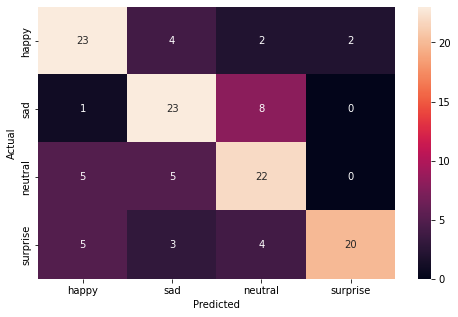

In [ ]:
# I have chosen to use the EfficientNet Model here.


# Plot the confusion matrix and generate a classification report for the model
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
test_set = datagen_test.flow_from_directory(folder_path + "test",
                                                              target_size = (img_size,img_size),
                                                              color_mode = 'grayscale',
                                                              batch_size = 128,
                                                              class_mode = 'categorical',
                                                              classes = ['happy', 'sad', 'neutral', 'surprise'],
                                                              shuffle = True) 
test_images, test_labels = next(test_set)

# Write the name of your chosen model in the blank
pred = model.predict(test_images)
pred = np.argmax(pred, axis = 1) 
y_true = np.argmax(test_labels, axis = 1)

# Printing the classification report

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true, pred)
plt.figure(figsize = (8, 5))
sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['happy', 'sad', 'neutral', 'surprise'], yticklabels = ['happy', 'sad', 'neutral', 'surprise'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

**Observations and Insights:There are not many false positives detected in the dataset.**

## **Conclusion: EfficientNet outperformed the other models after being appropriately trained.**

### **Insights**

### **Refined insights**:
- What are the most meaningful insights from the data relevant to the problem?
  - It is important to explore and curate the dataset. 
  - There were a number of images that were corrupted in the data that were giving erroneous training & testing results.
  - These corrupted images were typically below 1KB in file size which was below the normal file size.
  - The images were typically at the head or the tail of the dataset.


### **Comparison of various techniques and their relative performance**:
- How do different techniques perform? Which one is performing relatively better? 
  - EfficientNet was best for the high performance and low computational cost.

- Is there scope to improve the performance further?
  - There is scope to improve the performance further by increasing the number of epochs and implementing the use of a GPU.
